<div class='alert alert-success'>
    <h1 align="center">Search Algorithms: Uninformed Search Strategies</h1> 
    <h3 align="center">Artificial Intelligece Course (Fall 2021)</h3>
    <h5 align="center">Seyed Naser RAZAVI <a href='http://www.snrazavi.ir/ai-slides/'>(website)</a></h5>
</div>

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
from collections import namedtuple

from utils import *
from npuzzle import NPuzzleState

## Uninformed Search Strategies

In uniformed (blind) search strategies, we don't have any additional information other than the information provided in the problem formulation (states, actions, initial state and goal state(s)). 

Later you will see informed search strategis in which you have other information (heuristics) that during the search process guide you towards the goal state.

- BFS (Breadth First Search)
- UCS (Uniform Cost Search)
- DFS (Depth First Search)
- DLS (Depth Limitted Search)
- IDS (Iterative Deepening Search)

## Graph Search

<img src='imgs/Graph_Search_Algorithm.png' width='80%'>

### BFS
- Frontier is a FIFO list (or queue) and is implemented in the `utils.py`.

In [2]:
Node = namedtuple('Node', 'state parent action cost')

def BFS(start_state, goal_state):
    
    explored = set()
    
    frontier = Queue()
    frontier.push(Node(start_state, None, None, 0))    

    num_generated = 0
    
    while not frontier.is_empty():        
        # select a candidate node
        node = frontier.pop()
        explored.add(node.state)

        # goal test
        if node.state == goal_state: 
            return solution(node), num_generated
        
        # expand
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            if successor not in explored:
                frontier.push(Node(successor, node, action, node.cost + step_cost))
    
    return None, num_generated  # if no solution found

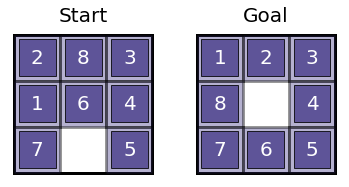

In [3]:
start_state_tiles = [
    2, 8, 3, 
    1, 6, 4, 
    7, 0, 5]

goal_state_tiles = [
    1, 2, 3, 
    8, 0, 4,
    7, 6, 5]

# define start state and goal state
start_state = NPuzzleState(tiles=start_state_tiles)
goal_state = NPuzzleState(tiles=goal_state_tiles)

# plot the start state and the goal state
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
start_state.plot(axes[0], 'Start')
goal_state.plot(axes[1], 'Goal')
plt.show()

Number of generated nodes: 122


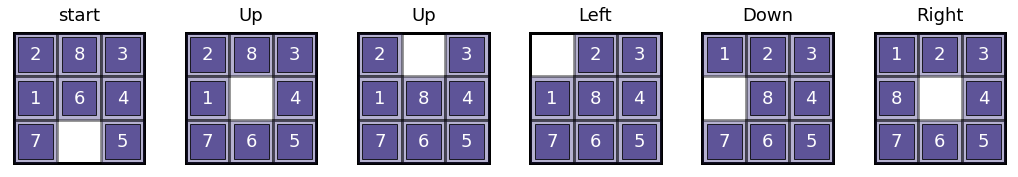

In [4]:
solution_path, N = BFS(start_state, goal_state)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

### BFS Improvement 

- Performing goal test right **after generating a node** (not before expanding the node).

<img src='imgs/BFS.png' width='80%'>

In [5]:
def BFS(start_state, goal_state):
    
    reached = set()
    frontier = Queue()
    num_generated = 0

    node = Node(start_state, None, None, 0)
    
    if start_state == goal_state:
        return solution(node), num_generated
    
    frontier.push(node)
    reached.add(start_state)
    
    while not frontier.is_empty():        
        # select a candidate node
        node = frontier.pop()
                
        # expand
        for successor, action, step_cost in node.state.successors():
            num_generated += 1

            if successor == goal_state:
                return solution(Node(successor, node, action, node.cost + step_cost)), num_generated
            
            if successor not in reached:
                reached.add(successor)
                frontier.push(Node(successor, node, action, node.cost + step_cost))
    
    return None, num_generated  # if no solution found

Number of generated nodes: 70


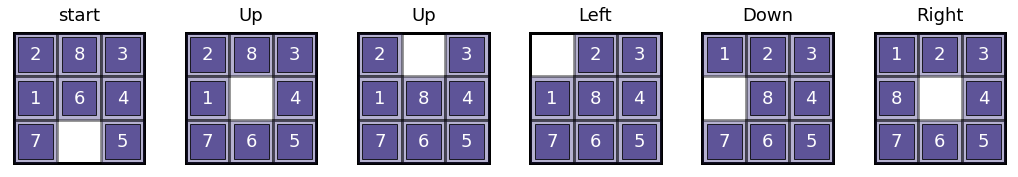

In [6]:
solution_path, N = BFS(start_state, goal_state)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

## UCS
- Frontier is a priority queue, in which nodes are sorted according to their path costs. 
- Again, the implementation of priority queue is given in the `utils.py`.

<img src='imgs/Best_First.png' width='80%'>

In [7]:
def UCS(start_state, goal_state):
    
    frontier = PriorityQueue()
    node = Node(start_state, None, None, 0)
    frontier.push(node, 0)  # push node and its priority
    
    reached = dict() # a dictionary of (state, node)
    reached[start_state] = node
    
    num_generated = 0
    
    while not frontier.is_empty():
        # select a candidate node
        node = frontier.pop()
        
        # goal test
        if node.state == goal_state:
            return solution(node), num_generated
        
        # expand        
        for successor, action, step_cost in node.state.successors():
            num_generated += 1
            path_cost = node.cost + step_cost
            
            if successor not in reached or path_cost < reached[successor].cost:
                child_node = Node(successor, node, action, path_cost)
                reached[successor] = child_node
                frontier.push(child_node, path_cost)
    
    return None, num_generated  # if no solution found

Number of generated nodes: 122


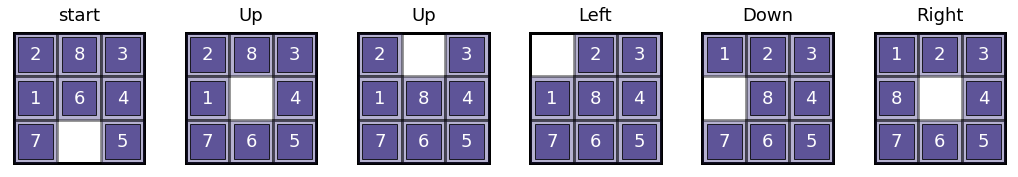

In [8]:
solution_path, N = UCS(start_state, goal_state)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

**Note**: that because in this problem, the cost of all the actions are equal, the UCS strategy is exactly the same as BFS strategy (the unoptimized version).

### DFS
- Frontier is a LIFO list (or stack).

<img src='imgs/DFS_Example.png' width='80%'>

In [9]:
def DFS(start_state, goal_state):
    
    def is_cycle(node):
        state = node.state
        while node.parent is not None:
            if state == node.parent.state:
                return True
            node = node.parent
        return False

    
    frontier = Stack()
    frontier.push(Node(start_state, None, None, 0))
    
    num_generated = 0
    
    while not frontier.is_empty():
        # select a candidate node
        node = frontier.pop()
                
        # goal test
        if node.state == goal_state: 
            return solution(node), num_generated
        
        # expand
        if not is_cycle(node):
            for successor, action, step_cost in node.state.successors():
                frontier.push(Node(successor, node, action, node.cost + step_cost))
                num_generated += 1
        
    return None, num_generated

In [10]:
# solution_path, N = DFS(start_state, goal_state)

# print(f"Number of generated nodes: {N}")
# print(f"Length of solution path: {len(solution_path)}")
# if len(solution_path) <= 30:
#     show_solution(start_state, solution_path, ncols=6)

### DLS

<img src='imgs/DLS_IDS.png' width='80%'>

In [11]:
def DLS(start_state, goal_state, limit=30):
    
    def is_cycle(node):
        state = node.state
        while node.parent is not None:
            if state == node.parent.state:
                return True
            node = node.parent
        return False
            
    
    frontier = Stack()
    frontier.push(Node(start_state, None, None, 0))  # 0 is the depth of the start node
    result = 'failure'
    
    num_generated = 0
    
    while not frontier.is_empty():
        # select a candidate node
        node = frontier.pop()
                
        # goal test
        if node.state == goal_state: 
            return solution(node), num_generated
        
        # before expansion, check the depth limit
        if node.cost >= limit:
            result = 'cutoff'
        elif not is_cycle(node):
            # expand                
            for successor, action, step_cost in node.state.successors():
                frontier.push(Node(successor, node, action, node.cost + step_cost))
                num_generated += 1
        
    return result, num_generated

Perform a depth limitted search with depth limit 15.

Number of generated nodes: 2347


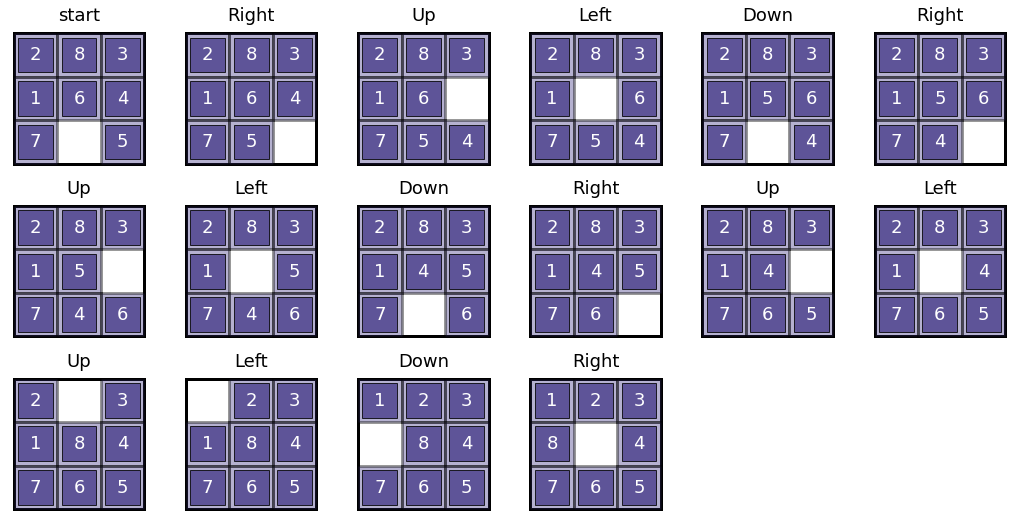

In [12]:
solution_path, N = DLS(start_state, goal_state, limit=15)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

Perform a depth limitted search with depth limit 10.

Number of generated nodes: 823


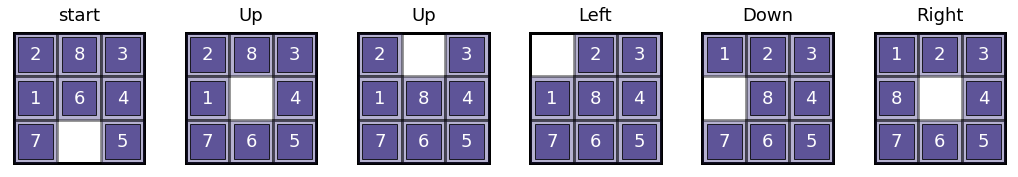

In [13]:
solution_path, N = DLS(start_state, goal_state, limit=10)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

Perform a depth limitted search with depth limit 5.

Number of generated nodes: 56


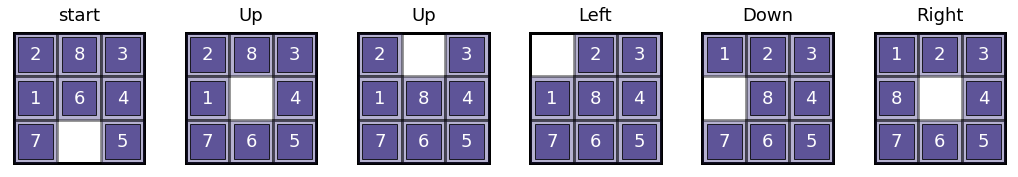

In [14]:
solution_path, N = DLS(start_state, goal_state, limit=5)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

Perform a depth limitted search with depth limit 3.

In [15]:
solution_path, N = DLS(start_state, goal_state, limit=3)

print(f"Number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

Number of generated nodes: 26
No solution found!


### IDS

In [16]:
def IDS(start_state, goal_state):
    limit = 0
    total_count = 0
    
    while True:
        solution_path, N = DLS(start_state, goal_state, limit)
        print(f'DLS (limit={limit}), number of generated nodes = {N:3d}')
        limit += 1
        total_count += N
        
        if isinstance(solution_path, list):
            return solution_path, total_count

DLS (limit=0), number of generated nodes =   0
DLS (limit=1), number of generated nodes =   3
DLS (limit=2), number of generated nodes =  11
DLS (limit=3), number of generated nodes =  26
DLS (limit=4), number of generated nodes =  50
DLS (limit=5), number of generated nodes =  56
Total number of generated nodes: 146


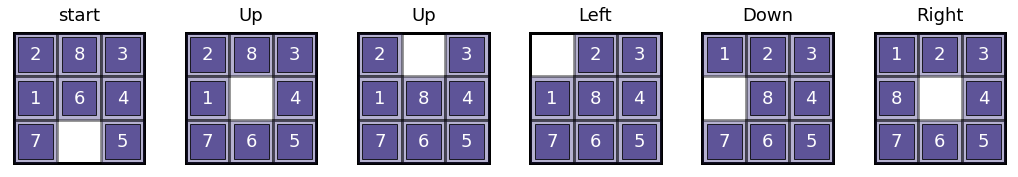

In [17]:
solution_path, N = IDS(start_state, goal_state)

print(f"Total number of generated nodes: {N}")
show_solution(start_state, solution_path, ncols=6)

## What is next?
- Time complexity of uninformed search strategies are **exponential**!
- Therefore, we need faster search strategis to solve hard real problems.
- In the next lesson, we will explore some informed search strategies which are usually much faster than uninformed search strategies.